# I love LSD

## Create a structured pattern in noise

In [1]:
nb_syn, noise_density, simtime, t_true = 50, 1e-3, 1e3, .5e3
T = 100

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def norm(X):
    return (X-X.min())/(X.max()-X.min())

def vonmises(N_inputs, A, theta, k=2):
    return A*norm(np.exp(k*np.cos(2*np.pi*(np.linspace(0, 1, N_inputs)-theta))))

def cospattern(N_inputs, A, theta, k=4):
    return A*norm(np.cos(k*np.pi*(np.linspace(0, 1, N_inputs)-theta)))

def linear(N_inputs, A, theta):
    return np.linspace(0, A, N_inputs)

def make_input(nb_syn, noise_density, simtime, T, t_true, theta=0, function=cospattern, seed=None):
    np.random.seed(seed)
    # draw random gaussian noise spike timings -> shape (nb_syn, nb_ev_noise)
    N_noise = int(noise_density*simtime*nb_syn)
    adress_noise = np.random.randint(0, nb_syn, N_noise)
    time_noise = np.random.randint(0, simtime, N_noise)

    # draw stimulus -> stim
    adress_pattern = np.arange(0, nb_syn)
    time_pattern = function(nb_syn, T, theta) + t_true #.astype(int)

    # make address event representation
    time = np.hstack((time_noise, time_pattern))
    addr = np.hstack((adress_noise, adress_pattern))
    sorted_times = np.argsort(time)
    aer = (addr[sorted_times], time[sorted_times])

    return (adress_noise, time_noise), (adress_pattern, time_pattern), aer

def plot_input(aer_noise, aer_pattern):
    adress_noise, time_noise = aer_noise
    adress_pattern, time_pattern = aer_pattern
    fig, ax = plt.subplots(figsize = (13, 8))
    ax.scatter(time_pattern, adress_pattern, color='red');
    ax.scatter(time_noise, adress_noise, color='grey')
    return fig, ax

In [3]:
noise = (np.random.random((nb_syn, int(noise_density*simtime)))*simtime).astype(int)
noise

array([[487],
       [650],
       [263],
       [762],
       [ 96],
       [394],
       [353],
       [948],
       [175],
       [932],
       [419],
       [246],
       [644],
       [494],
       [598],
       [184],
       [220],
       [615],
       [872],
       [676],
       [506],
       [677],
       [608],
       [819],
       [106],
       [ 88],
       [631],
       [ 48],
       [516],
       [168],
       [908],
       [774],
       [708],
       [614],
       [456],
       [ 79],
       [675],
       [848],
       [517],
       [  7],
       [653],
       [356],
       [568],
       [117],
       [ 27],
       [805],
       [451],
       [759],
       [258],
       [ 83]])

In [4]:
time_pattern = t_true + cospattern(nb_syn, T, theta=0)
t_true, time_pattern

(500.0,
 array([600.        , 598.36306152, 593.55931867, 585.90298559,
        575.89486512, 564.18959117, 551.5528089 , 538.81109372,
        526.79788469, 516.29896911, 508.00108394, 502.44699609,
        500.        , 500.82015434, 504.85381258, 511.83713205,
        521.31333189, 532.66257129, 545.14249339, 557.93678306,
        570.2085623 , 581.15513069, 590.06047018, 596.34208007,
        599.58907855, 599.58907855, 596.34208007, 590.06047018,
        581.15513069, 570.2085623 , 557.93678306, 545.14249339,
        532.66257129, 521.31333189, 511.83713205, 504.85381258,
        500.82015434, 500.        , 502.44699609, 508.00108394,
        516.29896911, 526.79788469, 538.81109372, 551.5528089 ,
        564.18959117, 575.89486512, 585.90298559, 593.55931867,
        598.36306152, 600.        ]))

In [5]:
aer_noise, aer_pattern, aer = make_input(nb_syn, noise_density, simtime, T, t_true)

In [6]:
aer_noise

(array([45, 40, 39, 47, 32, 39, 31, 29, 25, 31, 23, 21, 37, 29, 34, 35, 15,
        48, 45, 11, 47, 21,  2, 47,  5, 46, 17, 37, 29, 48,  9, 29, 42, 29,
        36, 30, 23, 31, 22,  3,  9, 24,  4, 20,  0, 15, 15, 41,  7, 30]),
 array([150, 826, 613, 529, 744, 929, 412, 684, 503, 652, 538, 906, 846,
        760, 825, 903, 374, 111, 121, 128, 509, 990, 884, 411, 305, 636,
        849, 111, 276, 428, 470, 690, 103, 656, 110, 839, 992, 475, 587,
        541, 854, 128, 316,  84, 446, 580, 101, 577, 836, 439]))

In [7]:
aer_pattern

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 array([600.        , 598.36306152, 593.55931867, 585.90298559,
        575.89486512, 564.18959117, 551.5528089 , 538.81109372,
        526.79788469, 516.29896911, 508.00108394, 502.44699609,
        500.        , 500.82015434, 504.85381258, 511.83713205,
        521.31333189, 532.66257129, 545.14249339, 557.93678306,
        570.2085623 , 581.15513069, 590.06047018, 596.34208007,
        599.58907855, 599.58907855, 596.34208007, 590.06047018,
        581.15513069, 570.2085623 , 557.93678306, 545.14249339,
        532.66257129, 521.31333189, 511.83713205, 504.85381258,
        500.82015434, 500.        , 502.44699609, 508.00108394,
        516.29896911, 526.79788469, 538.81109372, 551.5528089 ,
        564.18959117, 575.89486512, 585.90298559, 593.55931867,
      

In [8]:
aer_pattern[1].min()

500.0

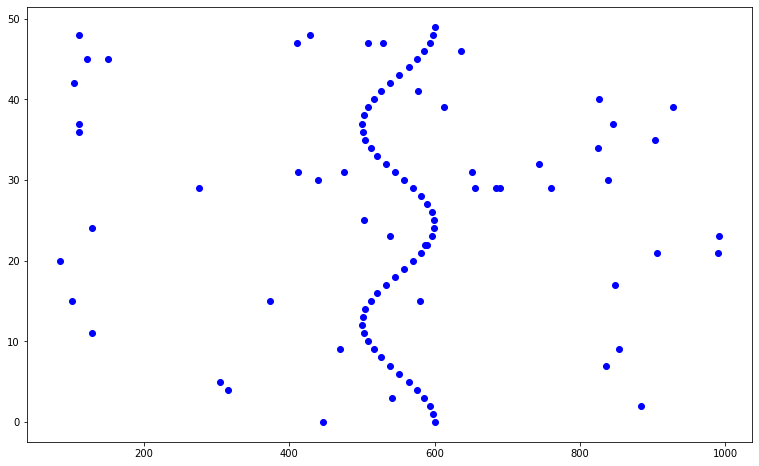

In [9]:
address, timestamp = aer
fig, ax = plt.subplots(figsize = (13, 8))
ax.scatter(timestamp, address, color='blue');

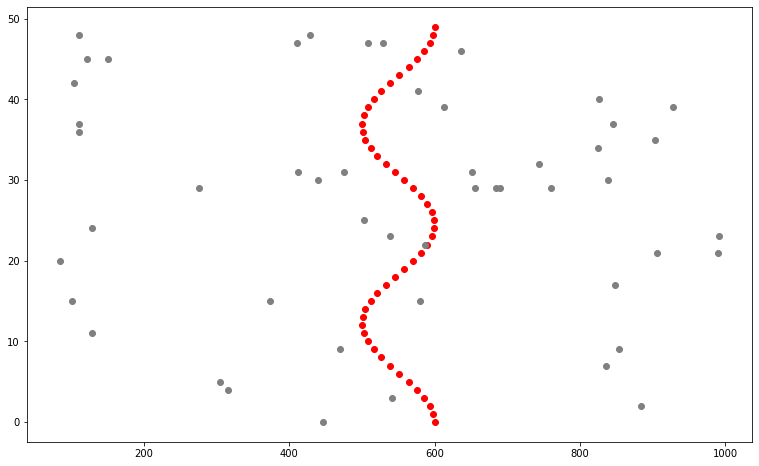

In [10]:
fig, ax = plot_input(aer_noise, aer_pattern)

In [11]:
t_true = aer_pattern[1].min()
t_true

500.0

## Supervised STDP learning rule

In [12]:
address

array([20, 15, 42, 36, 48, 37, 45, 24, 11, 45, 29,  5,  4, 15, 47, 31, 48,
       30,  0,  9, 31, 12, 37, 13, 36, 11, 38, 25, 14, 35, 39, 10, 47, 15,
       34, 40,  9, 16, 33, 41,  8, 47, 17, 32, 23, 42,  7,  3, 18, 31, 43,
        6, 19, 30, 44,  5, 20, 29, 45,  4, 41, 15, 28, 21,  3, 46, 22, 22,
       27,  2, 47, 23, 26,  1, 48, 25, 24, 49,  0, 39, 46, 31, 29, 29, 29,
       32, 29, 34, 40,  7, 30, 37, 17,  9,  2, 35, 21, 39, 21, 23])

In [13]:
delays = np.random.randint(0, 100, nb_syn).astype(float)

In [14]:
delays[address]

array([41., 37.,  0., 51., 15., 14., 78., 97.,  0., 78., 47., 46., 14.,
       37., 96., 71., 15., 64., 66., 33., 71., 16., 14., 32., 51.,  0.,
       55., 81., 41., 79., 43., 85., 96., 37., 82., 70., 33., 36., 33.,
       69.,  6., 96., 37., 89., 25.,  0., 28., 77., 72., 71., 49.,  8.,
       67., 64., 24., 46., 41., 47., 78., 14., 69., 37., 69., 48., 77.,
       99.,  8.,  8., 19., 10., 96., 25., 65., 61., 15., 81., 97., 63.,
       66., 43., 99., 71., 47., 47., 47., 89., 47., 82., 70., 28., 64.,
       14., 37., 33., 10., 79., 48., 43., 48., 25.])

In [15]:
timestamp

array([ 84.        , 101.        , 103.        , 110.        ,
       111.        , 111.        , 121.        , 128.        ,
       128.        , 150.        , 276.        , 305.        ,
       316.        , 374.        , 411.        , 412.        ,
       428.        , 439.        , 446.        , 470.        ,
       475.        , 500.        , 500.        , 500.82015434,
       500.82015434, 502.44699609, 502.44699609, 503.        ,
       504.85381258, 504.85381258, 508.00108394, 508.00108394,
       509.        , 511.83713205, 511.83713205, 516.29896911,
       516.29896911, 521.31333189, 521.31333189, 526.79788469,
       526.79788469, 529.        , 532.66257129, 532.66257129,
       538.        , 538.81109372, 538.81109372, 541.        ,
       545.14249339, 545.14249339, 551.5528089 , 551.5528089 ,
       557.93678306, 557.93678306, 564.18959117, 564.18959117,
       570.2085623 , 570.2085623 , 575.89486512, 575.89486512,
       577.        , 580.        , 581.15513069, 581.15

In [16]:
T = 100 # duration of a stimulus

class SD_neuron(object):
    """
    Synchrony detector neuron
    
    """
    def __init__(self, nb_syn, T=T,  tau=50, weight=.02):
        self.delays = np.random.rand(nb_syn) * T
        self.tau = tau # membrane time constant
        self.weight = weight # integration weight

    def code(self, aer):

        addresses, timestamps = aer

        delayed_timestamps = timestamps + self.delays[addresses]

        #sorted_ind_times = np.argsort(delayed_timestamps)
        sorted_times = np.sort(delayed_timestamps)

        V = self.weight * np.arange(len(addresses)) #* np.exp(-sorted_times/self.tau)
        
        #return delayed_timestamps[sorted_ind_times], V
        return sorted_times, V

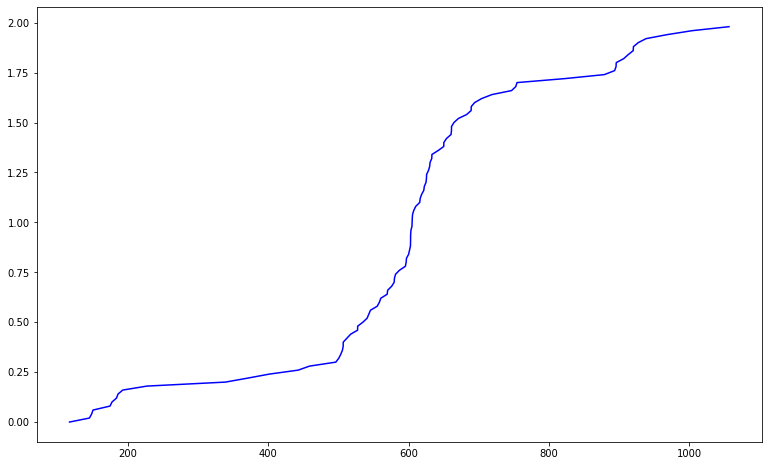

In [17]:
N = SD_neuron(nb_syn)

sorted_times, V = N.code(aer)
fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(sorted_times, V, color='blue');

In [18]:
V

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08,
       1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22, 1.24, 1.26, 1.28, 1.3 ,
       1.32, 1.34, 1.36, 1.38, 1.4 , 1.42, 1.44, 1.46, 1.48, 1.5 , 1.52,
       1.54, 1.56, 1.58, 1.6 , 1.62, 1.64, 1.66, 1.68, 1.7 , 1.72, 1.74,
       1.76, 1.78, 1.8 , 1.82, 1.84, 1.86, 1.88, 1.9 , 1.92, 1.94, 1.96,
       1.98])

In [19]:
V>1.

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [20]:
np.argmax(V>1)

51

In [21]:
t_out = sorted_times[np.argmax(V>1)]
t_out

605.2779398812331

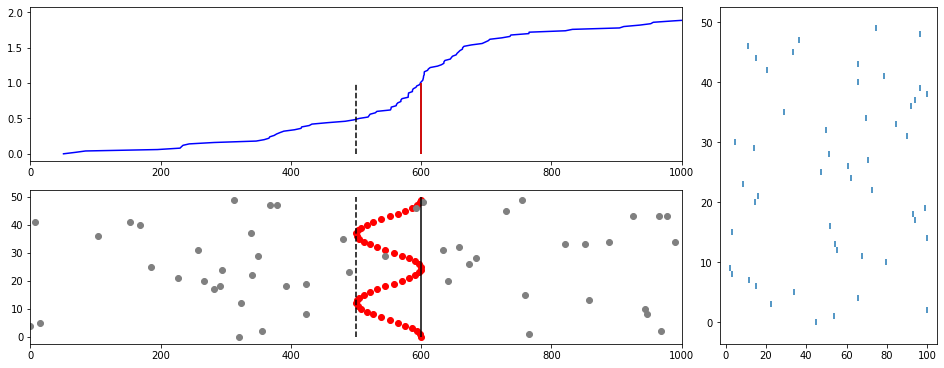

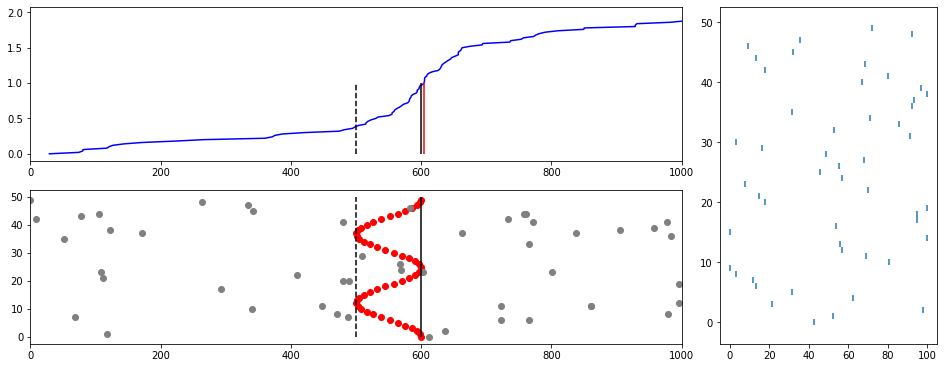

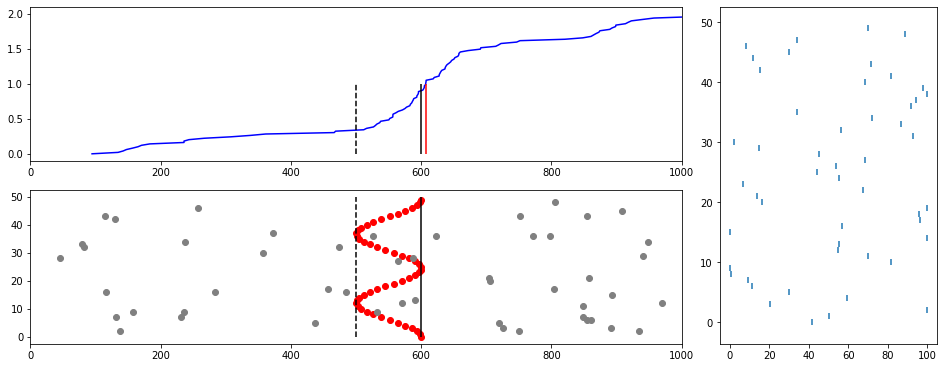

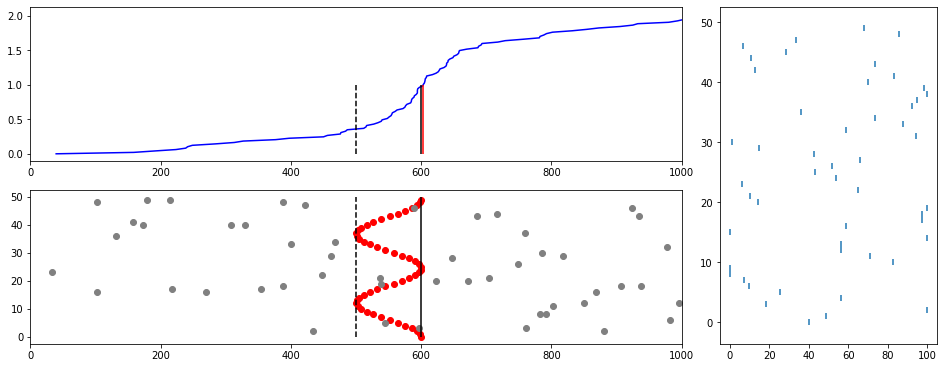

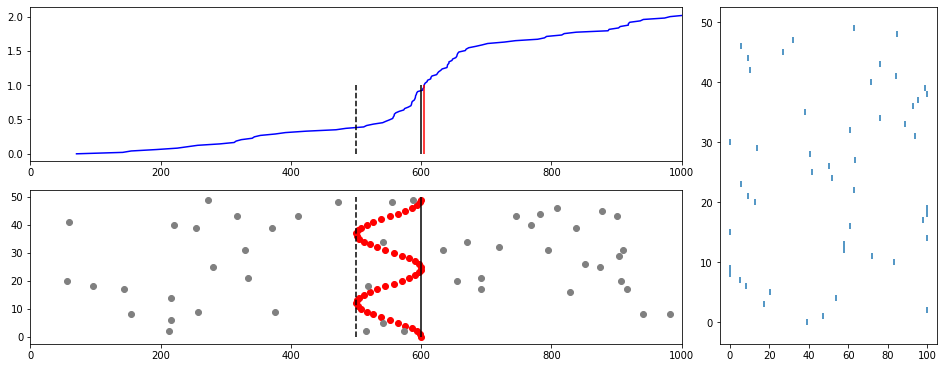

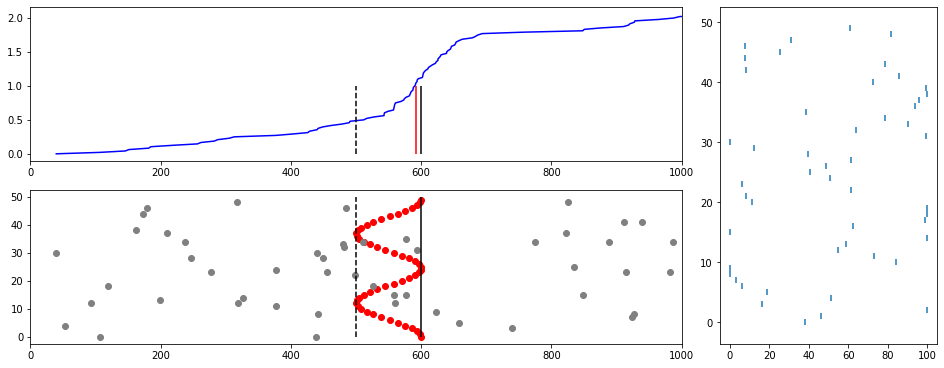

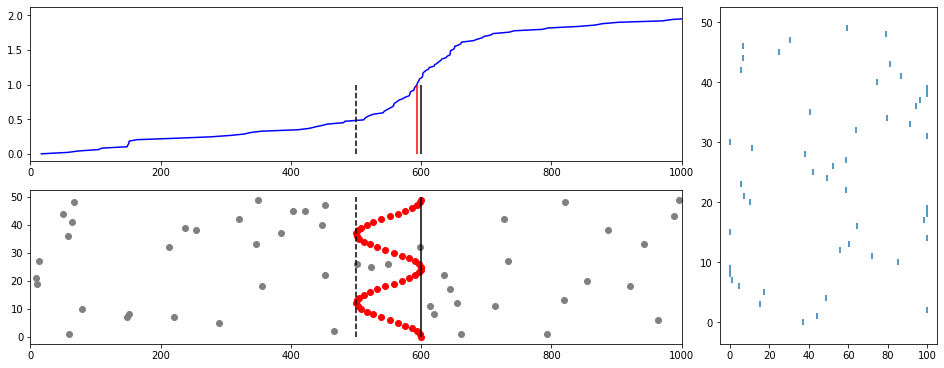

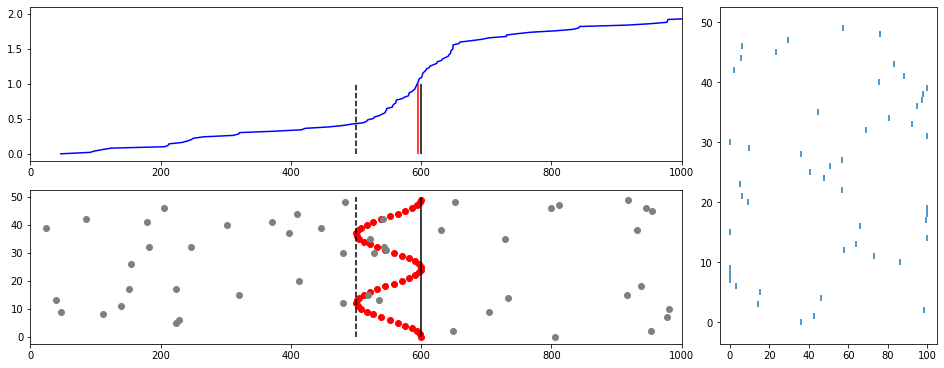

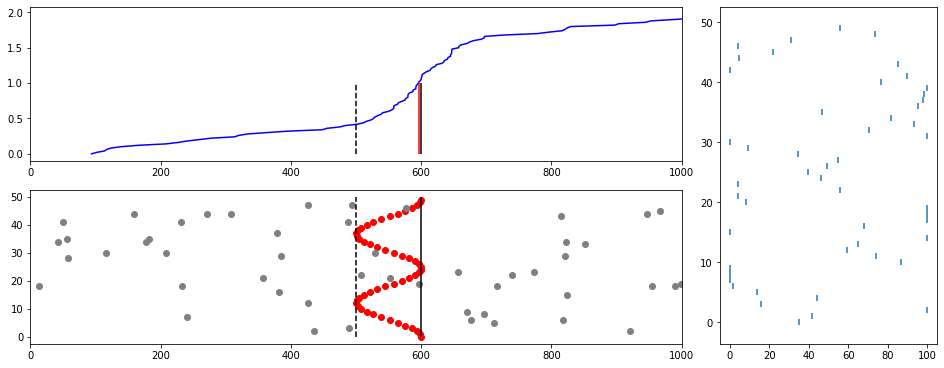

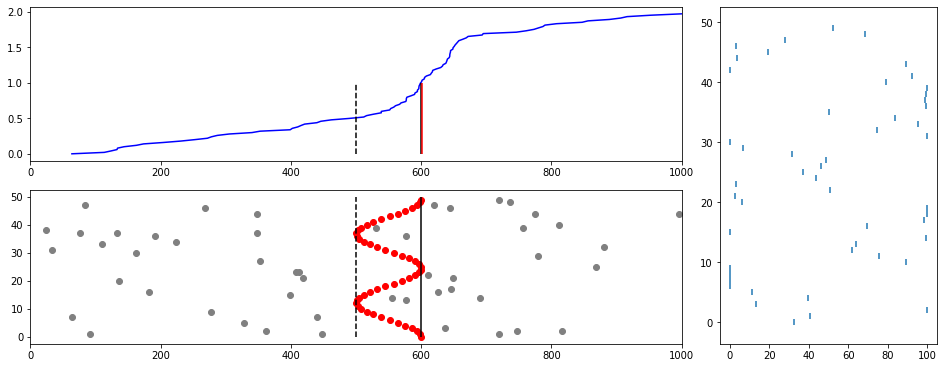

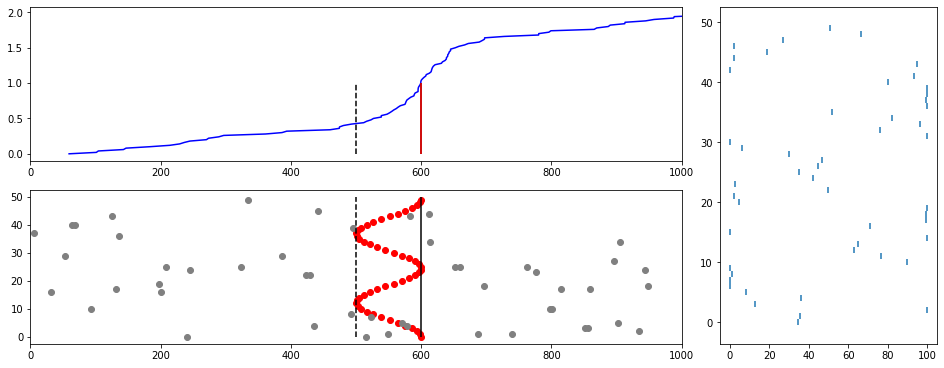

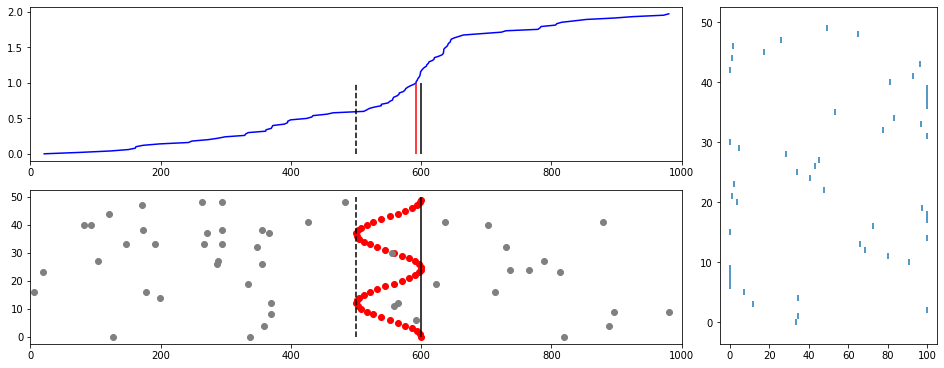

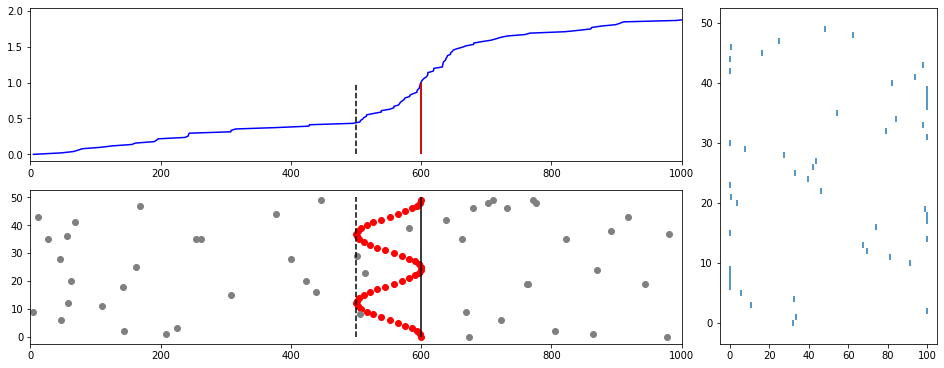

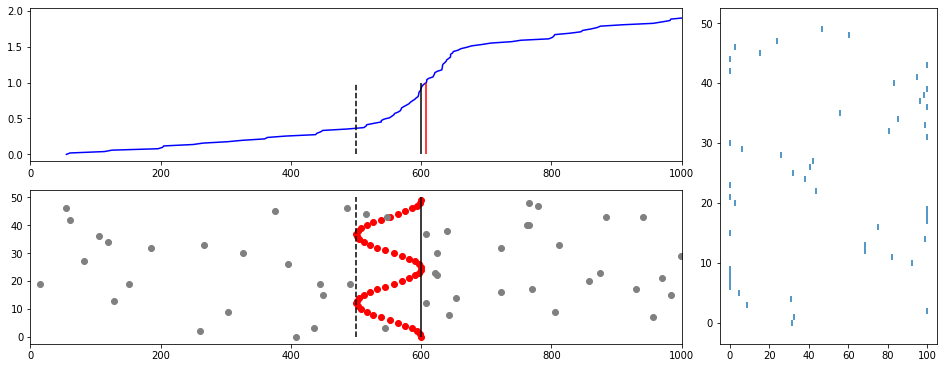

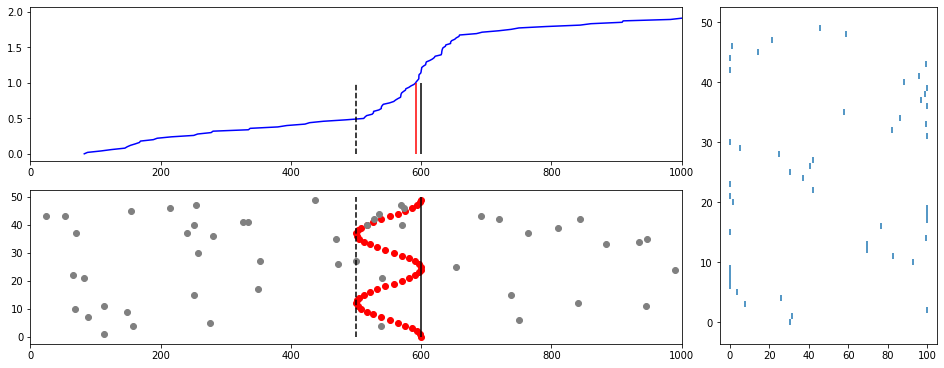

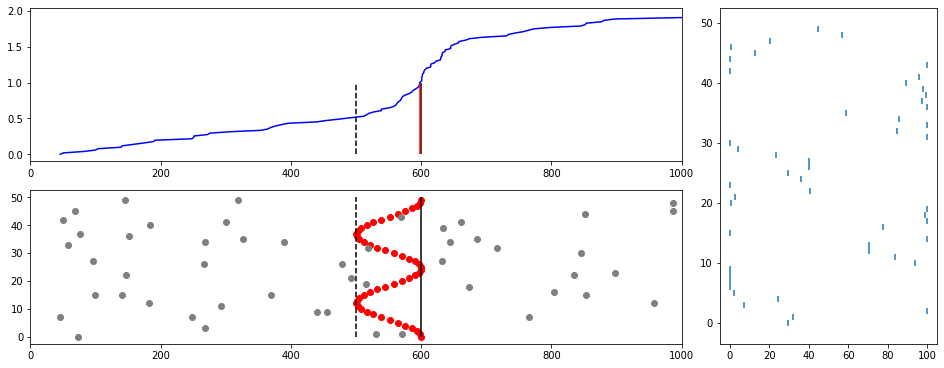

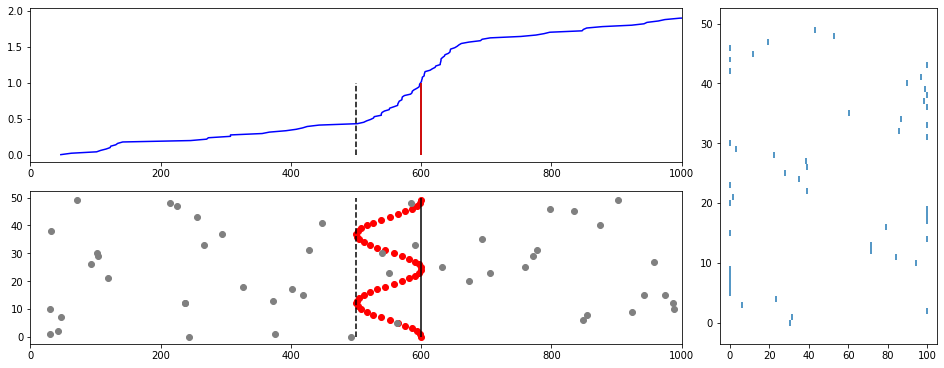

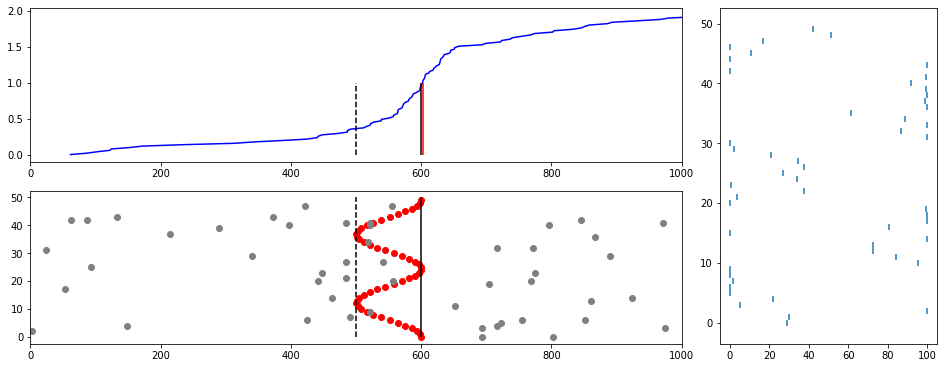

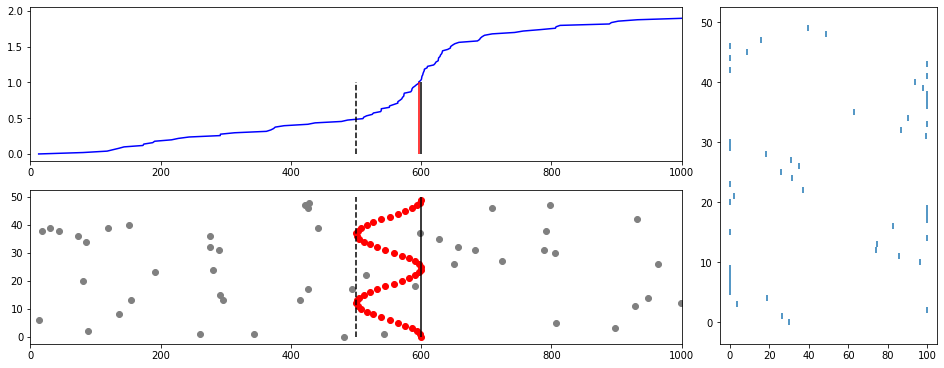

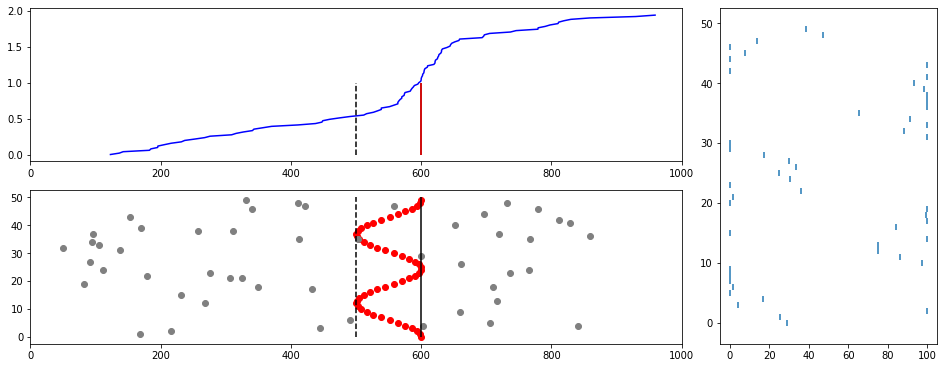

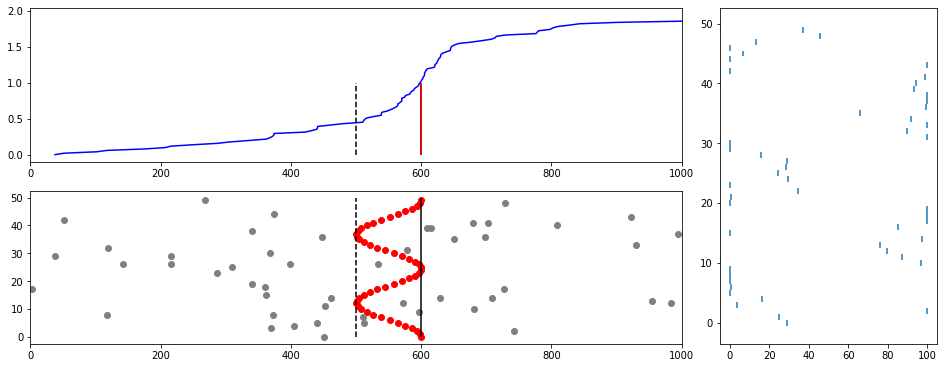

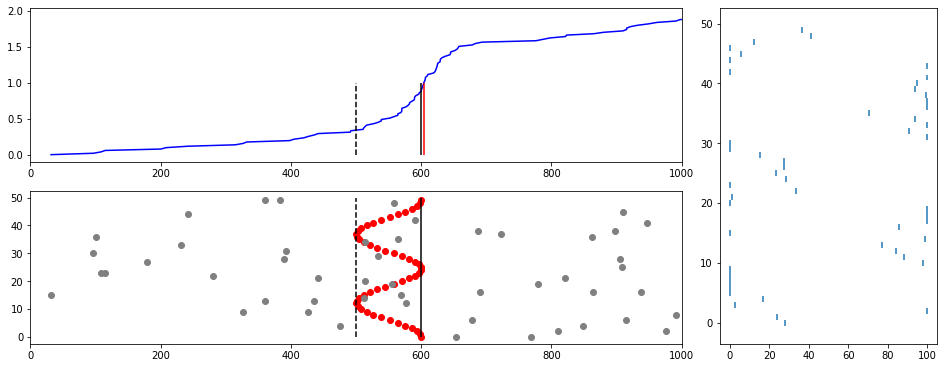

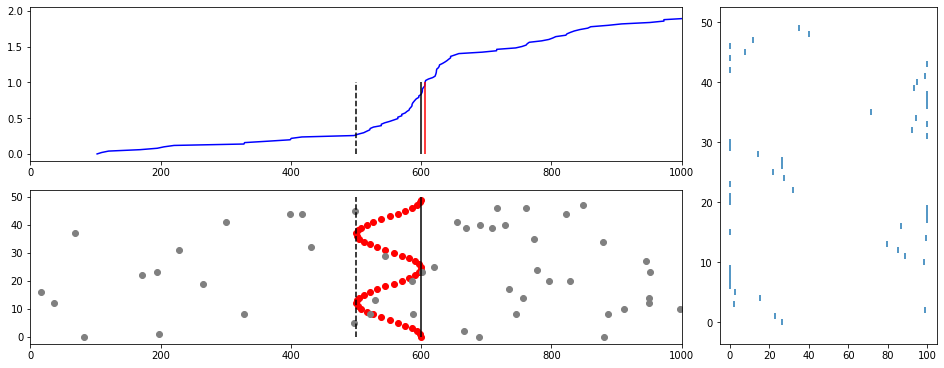

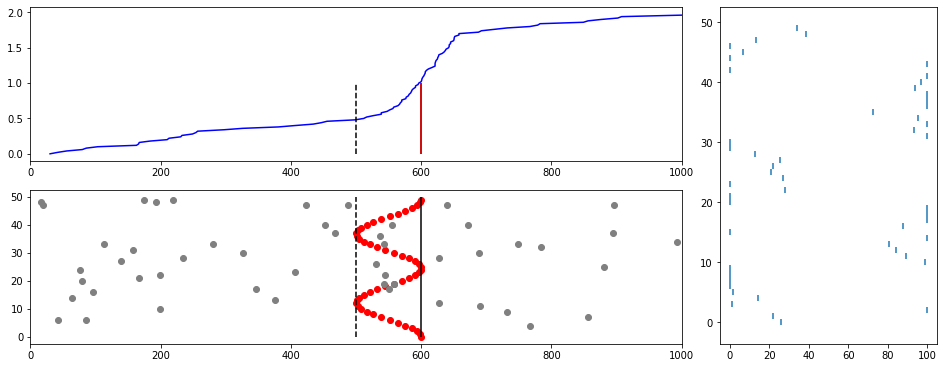

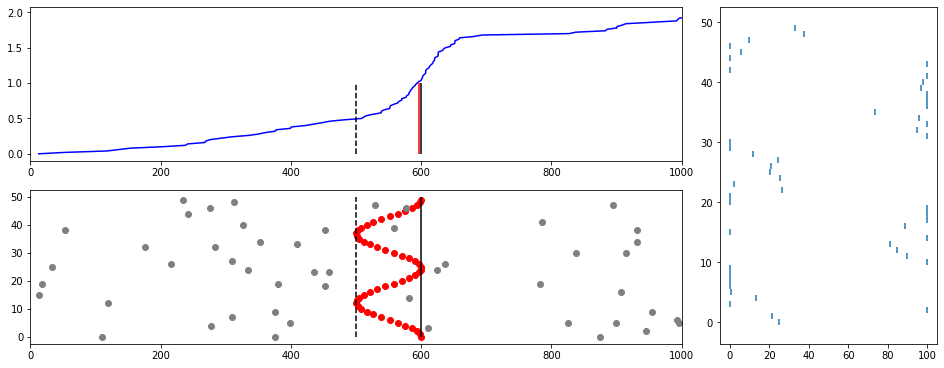

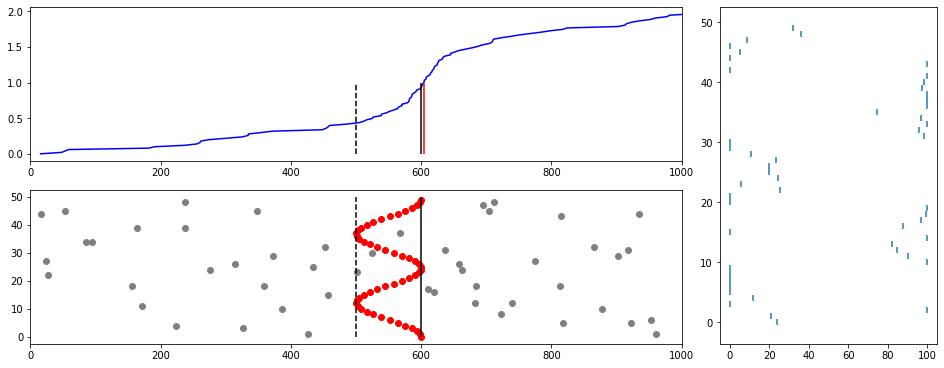

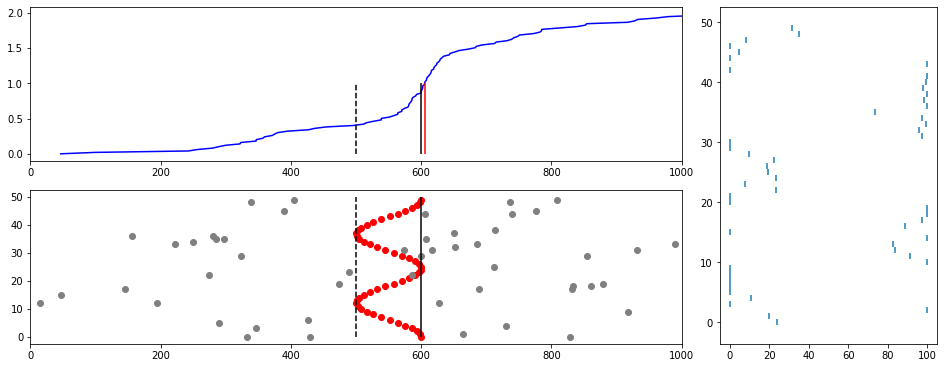

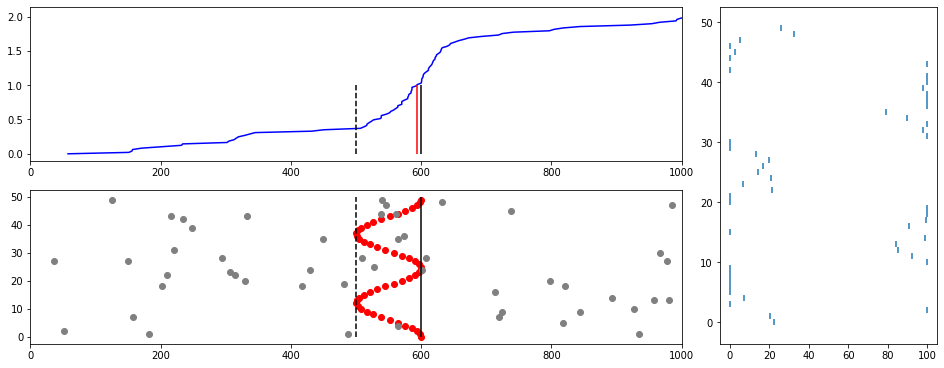

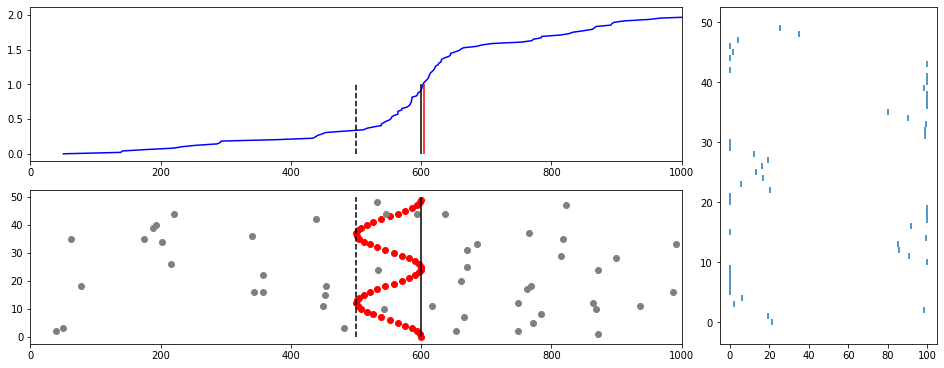

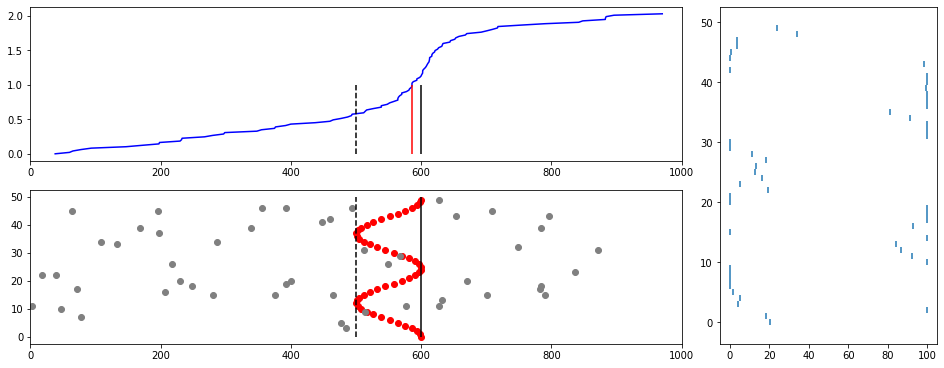

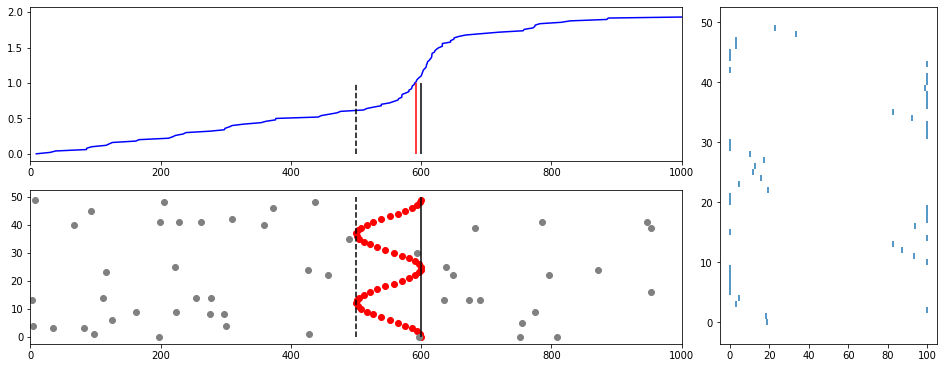

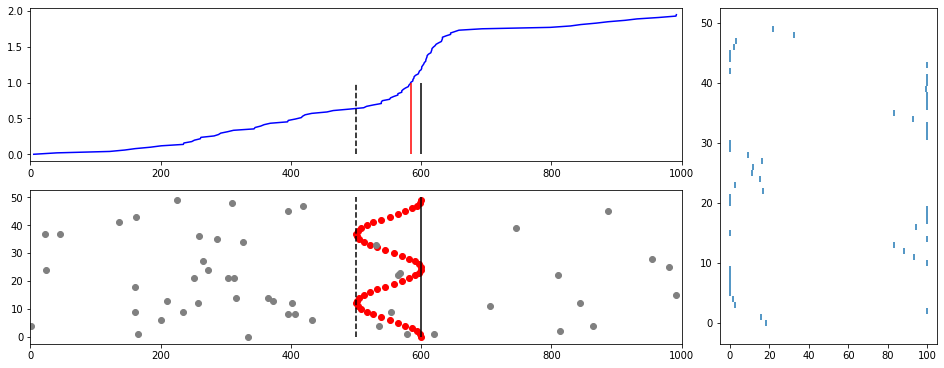

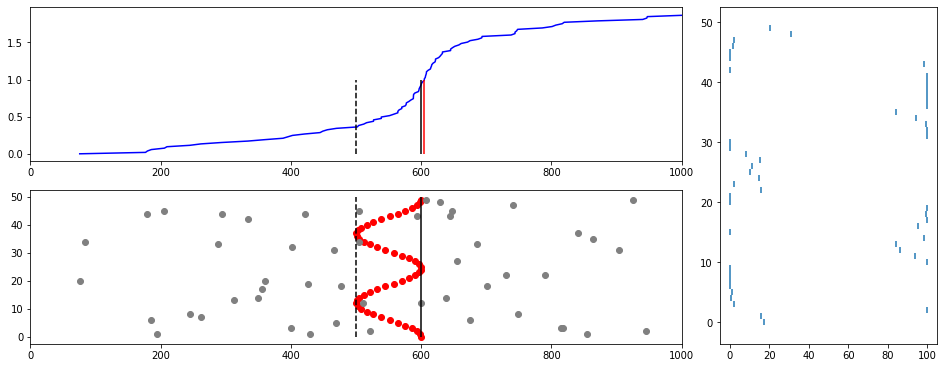

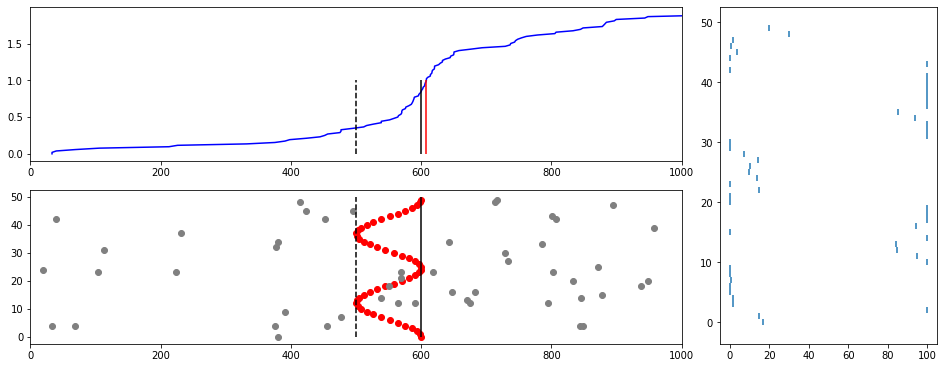

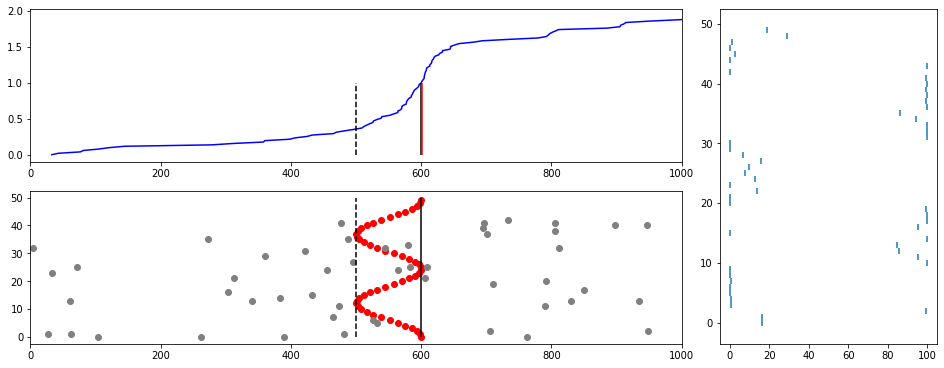

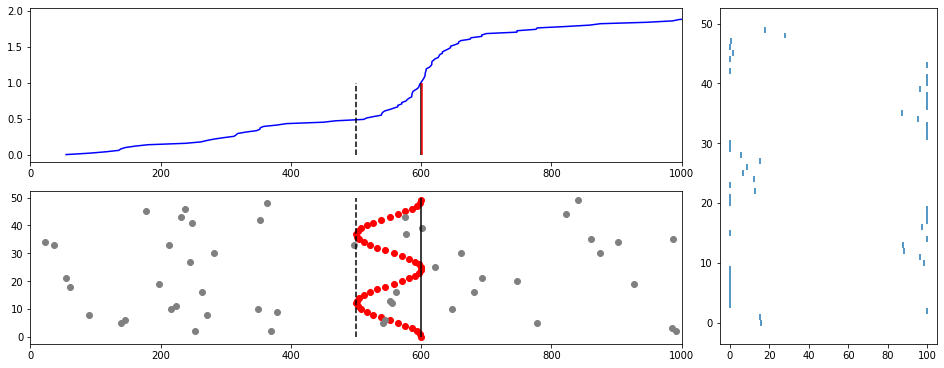

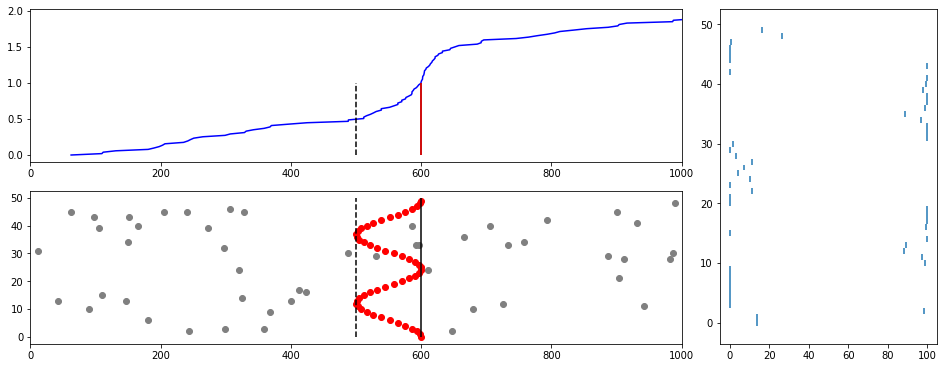

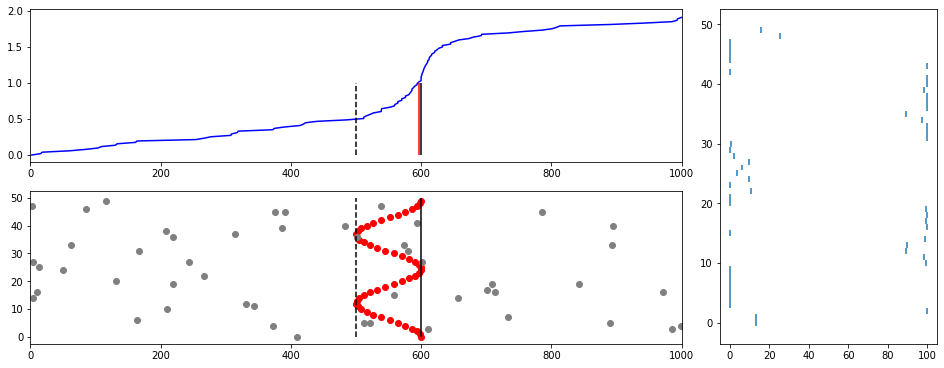

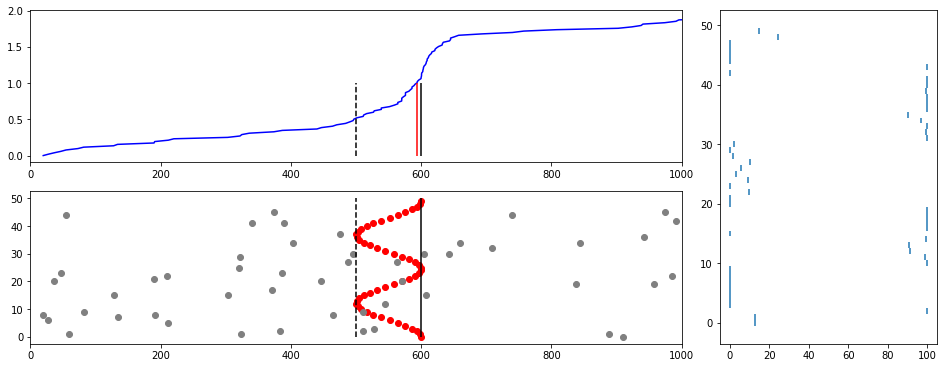

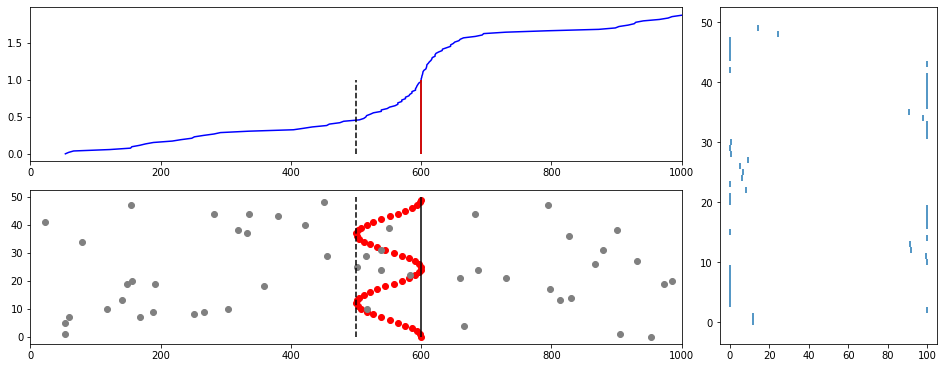

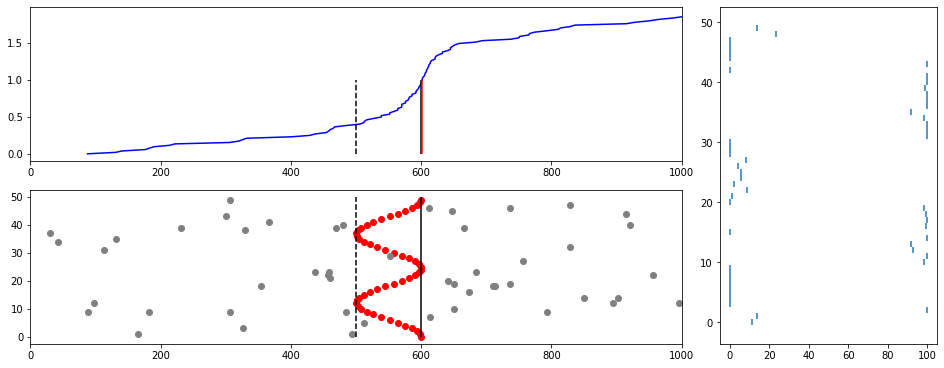

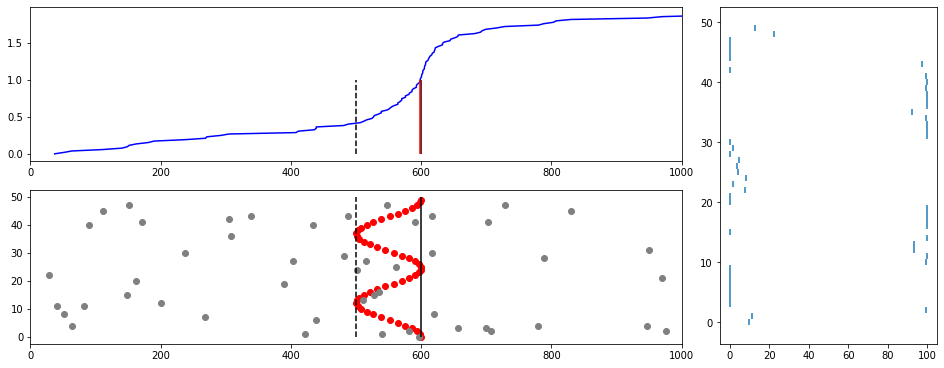

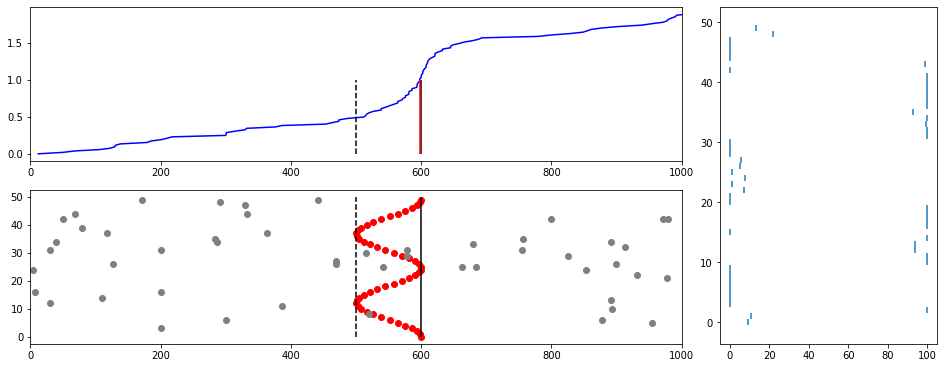

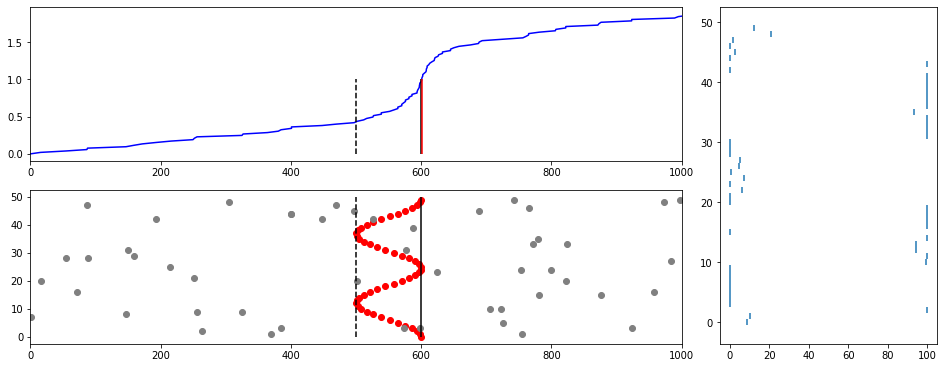

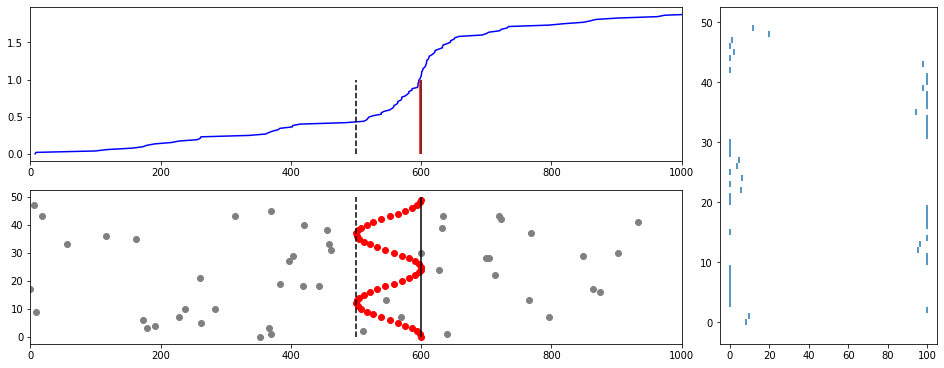

In [23]:
N = SD_neuron(nb_syn)

Dweight0 = 1e-1
Ddelay0 = 4.
N_epochs = 50

for i_epoch in range(N_epochs):
    t_true = 500 #int(np.random.rand()*(simtime-T))
    aer_noise, aer_pattern, aer = make_input(nb_syn, noise_density, simtime, T, t_true)
    sorted_times, V = N.code(aer)

    # STDP rule on the weights
    if V.max() < 1: # does not spike : the weight is too low
        Dweight = Dweight0
    else:
        t_out = sorted_times[np.argmax(V>1)] # output spike
        time_error = (t_true+T) - t_out # negative = too early, positive = too late
        Dweight = Dweight0 * np.tanh( - time_error / N.tau )

        # STDP rule on the delays, event by event
        addresses, timestamps = aer
        for i_address, (address, timestamp) in enumerate(zip(addresses, timestamps)):
            # predicted time by neuron:
            pred_time = t_true + N.delays[address] # T - 
            # timestamp is that of the i_address-th event - it is fired on synapse address
            delay_pred_error = pred_time - timestamp
            # STDP rule
            Ddelay = Ddelay0 * np.sign(delay_pred_error) * np.exp( - np.abs(delay_pred_error) / N.tau )
            delay = N.delays[address]
            delay += Ddelay
            delay= np.min((delay, T))
            delay = np.max((delay, 0))
            N.delays[address] = delay

    N.weight *= 1 + Dweight
    #print(N.weight)
    
    if i_epoch % 10:
        fig = plt.figure(constrained_layout=True, figsize = (13, 5))
        axs = fig.subplot_mosaic(
        """
        AAAC
        BBBC
        """
        )
        
        axs['A'].plot(sorted_times, V, color='blue')
        axs['A'].vlines([t_true], 0, 1, linestyles='--', color='black')
        axs['A'].vlines([t_true+T], 0, 1, color='black')
        if V.max() > 1: axs['A'].vlines([t_out], 0, 1, color='red')
        axs['A'].set_xlim(0, simtime)
        adress_noise, time_noise = aer_noise
        adress_pattern, time_pattern = aer_pattern
        axs['B'].vlines([t_true], 0, nb_syn, linestyles='--', color='black')
        axs['B'].vlines([t_true+T], 0, nb_syn, color='black')
        axs['B'].scatter(time_pattern, adress_pattern, color='red');
        axs['B'].scatter(time_noise, adress_noise, color='grey')
        axs['B'].set_xlim(0, simtime)

        axs['C'].eventplot(N.delays[:,np.newaxis]);
        plt.show()